In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Reading the data set
data_results = pd.read_csv('data_results.csv')
data_results.head()

,realPrice,predictedPriceLR,predictedPriceDTR
0,69528.582261,67816.373316,68976.763099
1,101129.426257,107586.050486,107816.370860
2,30533.361497,30359.195458,35683.673673
3,32372.758703,34779.148845,39914.287247
4,57940.379864,52371.404268,68057.064496


In [2]:
#Defining the tolerance 
tolerance = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3,  0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
tolerance_df = pd.DataFrame(tolerance, columns=['Tolerance'])

tolerance_df['LRSuccessCount'] = 0
tolerance_df['DTRSuccessCount'] = 0

#Calculating the tolerance 
for i in range(len(tolerance)):
    tolerance_df.loc[i,'LRSuccessCount'] = ((data_results['predictedPriceLR'] >= ((1 - tolerance[i]) * data_results['realPrice']))
                                           & (data_results['predictedPriceLR'] <= ((1 + tolerance[i]) * data_results['realPrice']))).sum()
    tolerance_df.loc[i,'DTRSuccessCount'] = ((data_results['predictedPriceDTR'] >= ((1 - tolerance[i]) * data_results['realPrice']))
                                           & (data_results['predictedPriceDTR'] <= ((1 + tolerance[i]) * data_results['realPrice']))).sum()



In [3]:
#Calculating the Sum of errors for the Linear Regresion Model
OvError_LR = sum((data_results['realPrice']-data_results['predictedPriceLR']))
OvError_LR

144134.68641606052

In [4]:
#Calculating the Sum of errors for the Decision Tree Regression Model
OvError_DTR = sum((data_results['realPrice']-data_results['predictedPriceDTR']))
OvError_DTR

149532.54472826465

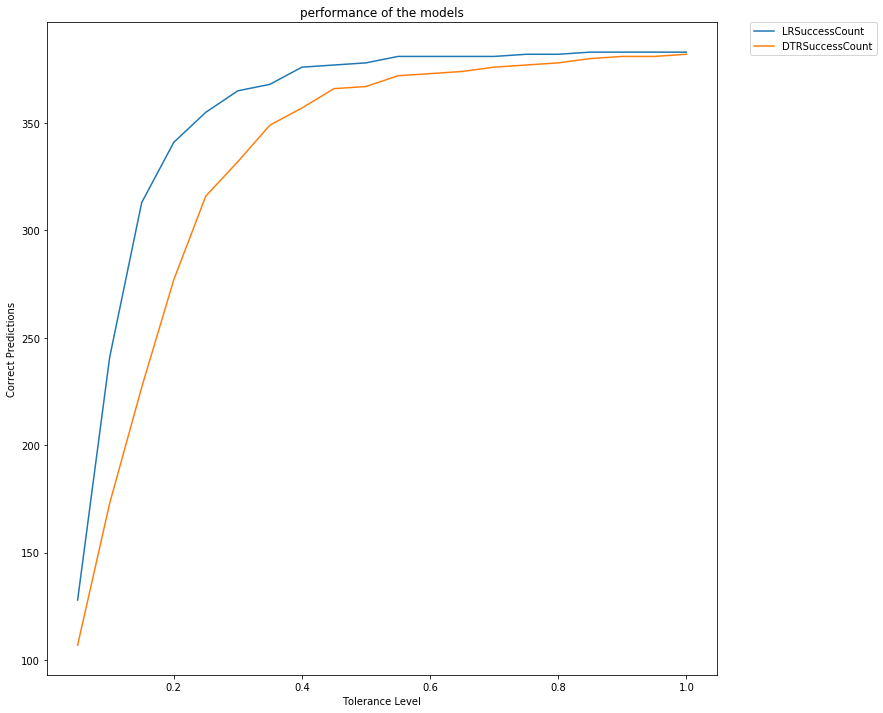

In [5]:
#Plotting the models performance on function of the tolerance 

fig = plt.figure(figsize=(12,12))

lr = plt.plot(tolerance_df['Tolerance'], tolerance_df['LRSuccessCount'], label='LRSuccessCount')
dtr = plt.plot(tolerance_df['Tolerance'], tolerance_df['DTRSuccessCount'], label='DTRSuccessCount')

plt.ylabel('Correct Predictions')
plt.xlabel('Tolerance Level')
plt.title("performance of the models")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()